# Sheet 2

### Mutation and selection

Consider the rosenbrock function:

$$
    f( x_1,x_2 ) := 100 ( x_2 - x_1^2 )^2 + ( 1 - x_1)^2.
$$

We want to minimize it using the mutation/selection method from the lecture. Implement the method using 
$$
 \delta_k := \frac{1}{1 + \beta k} \qquad k =1,2,3,\dots, N
$$
where $\beta = 5 \cdot 10^{-3}$, $N = 5000$ and where you start in $x_0 := (2,3)$. Plot all accepted steps in one figure by using a marker.
Print the final result, the relative error $e_{\text{rel}}$ to the true solution $x_{\text{opt}}$
$$
	e_{\text{rel}}(i) := \frac{\| x_{k_i} - x_{\text{opt}} \|_2 }{ \| x_{\text{opt}} \|_2}
$$
as a function of the number of the accepted steps $k_i$.

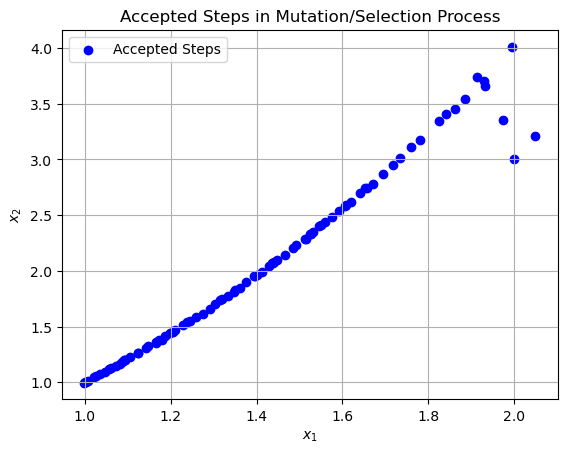

Number of accepted steps: 87
Optimal x: [1.00015336 1.00002382]
Relative error: 0.00010974411759193653


In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

def f( z ):
    x,y = z
    return 100 * ( y - x ** 2 )** 2 + ( 1 - x ) ** 2

def delta( beta, N ):
    # computes the array of all stepsizes delta_1, \dots, delta_N
    delta = np.array([1 / (1 + beta * k) for k in range(1, N + 1)])
    return delta

def mutation_selection( x0, f, delta):
    # Note: delta is a array with N entries
    np.random.seed(0)  # For reproducible results
    x = x0
    accepted_steps = []
    x_hist = [x]  # History of accepted x values

    # Implement the method and the plotting here
    for i, delta in enumerate(delta):
        # Generate a random mutation
        mutation = np.random.uniform(-0.5, 0.5, 2) * delta
        new_x = x + mutation
        # Selection step: Accept if the function value decreases
        if f(new_x) < f(x):
            x = new_x
            accepted_steps.append(i)
            x_hist.append(x)
    # print the number of accepted steps here

    x_hist = np.array(x_hist)
    plt.scatter(x_hist[:, 0], x_hist[:, 1], c='blue', marker='o', label='Accepted Steps')
    plt.title('Accepted Steps in Mutation/Selection Process')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(f"Number of accepted steps: {len(accepted_steps)}")
    return x

beta = .005
max_iter = 5000

x_0 = np.array([ 2,3 ])
x_star = mutation_selection( x_0 , f, delta( beta, max_iter ) )
x_opt = np.array([1,1])

# Final result
print("Optimal x:", x_star)
# print the relative error here:
rel_error = np.linalg.norm(x_star - x_opt) / np.linalg.norm(x_opt)
print("Relative error:", rel_error)
